In [28]:
# Importing Required Packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import style

In [2]:
# Connecting Google Colab with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading Canadian Immigration Dataset into a dataframe called data
data = pd.read_csv('/content/drive/MyDrive/Project_Data_Sets/canadia_Immegration_Data.csv')
data.head(10)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
5,Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,...,295,184,106,76,62,61,39,70,45,2113
6,Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,...,24,32,15,32,38,27,37,51,25,981
7,Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,...,1153,847,620,540,467,459,278,263,282,19596
8,Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
9,Australia,Oceania,Australia and New Zealand,Developed regions,702,639,484,317,317,319,...,909,875,1033,1018,1018,933,851,982,1121,23829


### Data Understanding stages
This is the priliminary stage that delas with basic under standing of data. This includes -
* Getting the shape of the data frame
* Getting column names of the data frame
* Getting column types of the data frame
* Checking if there is any missing value
* Getting a brief statistical summary of the dataframe's Numerical columns.

In [4]:
# Get the shape of the dataframe
shape = data.shape
print('Number of rows:', shape[0])
print('Number of Columns:', shape[1])

print('-------------------------------------------------------------------------------------')

# Get the column names of the data frame
columns = data.columns
print(' The column names are:', list(columns))

print('--------------------------------------------------------------------------------------')

# Type of columns
data_type = data.dtypes
for column_name, data_type in data_type.iteritems():
    print(f'Column Name: {column_name}, Data Type: {data_type}')

print('----------------------------------------------------------------------------------------')

# Checking for missing Values in the data frame
print(data.isna().sum())

print('-----------------------------------------------------------------------------------------')

# To check statistical summary of the data frame
summary_stats = data.describe()
summary_stats_df = pd.DataFrame(summary_stats)
print(summary_stats.head())

Number of rows: 195
Number of Columns: 39
-------------------------------------------------------------------------------------
 The column names are: ['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', 'Total']
--------------------------------------------------------------------------------------
Column Name: Country, Data Type: object
Column Name: Continent, Data Type: object
Column Name: Region, Data Type: object
Column Name: DevName, Data Type: object
Column Name: 1980, Data Type: int64
Column Name: 1981, Data Type: int64
Column Name: 1982, Data Type: int64
Column Name: 1983, Data Type: int64
Column Name: 1984, Data Type: int64
Column Name: 1985, Data Type: int64
Column Name: 1986, Data Type: int64
Column Name: 1987, Dat

<ipython-input-4-2df846cb6f2e>:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name, data_type in data_type.iteritems():


### Data Manupulation Stage Using Pandas Library
Somne stages that are included in this case are -
* Renaming columns
* Droping unimportant columns
* Manually Indexing the data frame
* Using .loc method to fetch value of a country
* Filtering data frame as per condition specified
* Removing the name of index parameter. Here 'Country'
* Getting least 5 countries contributing to immigration
* Getting top 5 countries contributing to immigration

In [5]:
# Renaming the required columns
# Here we rename the columns Region and DevName to Location and DevType
# There is a need of  the main data set. So instead of using inplace = True, a new data frame is created from data
data_new = data.rename(columns = {'Region':'Location','DevName':'DevType'})
print(data_new.columns)

print('----------------------------------------------------------------------------')

# Dropping some columns that are not needed
# Suppose we only need the country name and data after 2000. The code for this will be
data_precise = data.drop(['Continent','Region','DevName','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990'],axis = 1)
data_precise.head(5)
data_more_precise = data_precise.drop(['1991','1992','1993','1994','1995','1996','1997','1998','1999','2000'],axis = 1)
print(data_more_precise.columns)

print('-----------------------------------------------------------------------------')
# Setting the index by the country column
data_indexed = data.set_index('Country')
print(data_indexed.head(5))

print('------------------------------------------------------------------------------')
# Now by using this indexed data set, it is easy to fetch any country by loc method
years = list(map(str, range(1980, 2014)))
data_china = data_indexed.loc['China',years]
china_df = pd.DataFrame(data_china)
china_df.columns = ['Immigrants']
print(china_df.head(10))

print('--------------------------------------------------------------------------------')

# Filter operations on Data frames
# Fetch the Country names that are part of Asia continent and Loacted in Southern Asia Region
info = data[(data['Continent']=='Asia') & (data['Region']=='Southern Asia')]
print(info.Country)

print('-----------------------------------------------------------------------------------')
# It is possible to delete the name Counrty as Index
data_indexed.index.name = None
print(data_indexed.head(2))

print('------------------------------------------------------------------------------------')
# Sorting operation on data frame data
# It gives the ascending order by Total i.e. the least 5 countries that contribute to Immigration
data_last5 = data.sort_values('Total', ascending = True, axis = 0)
print(data_last5[['Country','Total']].head(5))

print('------------------------------------------------------------------------------------')

# Top 5 countries that contribute to Immigration to Canada Most
data_top5 = data.sort_values('Total', ascending = False, axis = 0)
print(data_top5[['Country','Total']].head(5))

print('-------------------------------------------------------------------------------------')
# Getting the name of the Countries that are present in the data frame
country_list = data.Country.tolist()
country_list

Index(['Country', 'Continent', 'Location', 'DevType', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')
----------------------------------------------------------------------------
Index(['Country', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')
-----------------------------------------------------------------------------
               Continent           Region             DevName  1980  1981  \
Country                                                                     
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'China, Hong Kong Special Administrative Region',
 'China, Macao Special Administrative Region',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'F

### Data Visualization Stage
In this stage different types of graphical tools are used
Use of Matplotlib, pyplot, numpy, pandas, seaborn etc.Some Graphical tools that are used in this section includes line plot, area plot, pie chart, box plot, histogram, comparisons using subplot, bubble plot etc.

* 1. Line plot for Immigration of Pakistan from 1980 to 2013
* 2. Line plot for Immigration of India from 1980 to 2013
* 3. Line Plot for Immigration of China from 1980 to 2013
* 4. Line Plot for Immigration of USA from 1980 to 2013
* 5. Line Plot for Immigration of UK from 1980 to 2013
* 6. Area plot of top 5 Immigration contributing Countries
* 7. Contribution of Continents in Immigration using pie chart
* 8. Comparating Immigration study of India, China, UK and USA using subplots
* 9. Comparating study of India China Immigration using Bubble chart
* 10. Comparating Study of India Pakistan Immigration using Bubble Chart
* 11. Analysing trend of immigration of Denmark, Norway and Sweden using Regression plot.


In [6]:
# Setting the index by the country column
data_indexed = data.set_index('Country')
print(data_indexed.head(5))
# Here to visualize the data, data_indexed will be used in some cases

               Continent           Region             DevName  1980  1981  \
Country                                                                     
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1     0   
Algeria           Africa  Northern Africa  Developing regions    80    67   
American Samoa   Oceania        Polynesia  Developing regions     0     1   
Andorra           Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...  2005  2006  2007  2008  \
Country                                       ...                           
Afghanistan       39    47    71   340   496  ...  3436  3009  2652  2111   
Albania            0     0     0     0     1  ...  1223   856   702   560   
Algeria           71    69    63    44    69  ...  3626  4807  3623  4005   
American Samoa     0     0     0     0     0  ...     0     1     0     0  

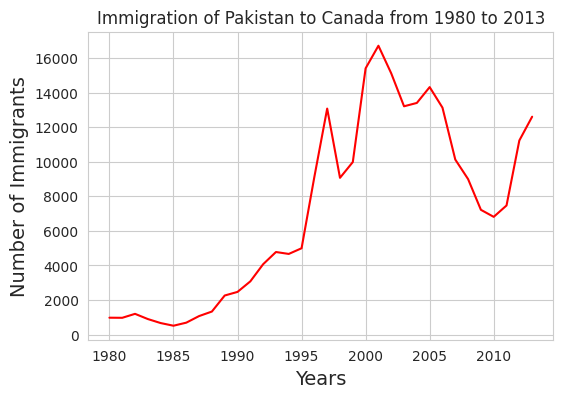

In [34]:
# Line Plot for immigration of Pakistan from 1980 to 2013
years = list(map(str, range(1980, 2014)))
data_pakistan = data_indexed.loc['Pakistan', years]
plt.figure(figsize = (6,4))
data_pakistan.plot(kind = 'line', color = 'red')
plt.xlabel('Years', fontsize = 14)
plt.ylabel('Number of Immigrants', fontsize = 14)
plt.title('Immigration of Pakistan to Canada from 1980 to 2013')
plt.grid(True)
plt.show()
# We can observe an increase in rise of immigration around year 2000
# It is caused due to economic crisis of pakistan caused due to war with india

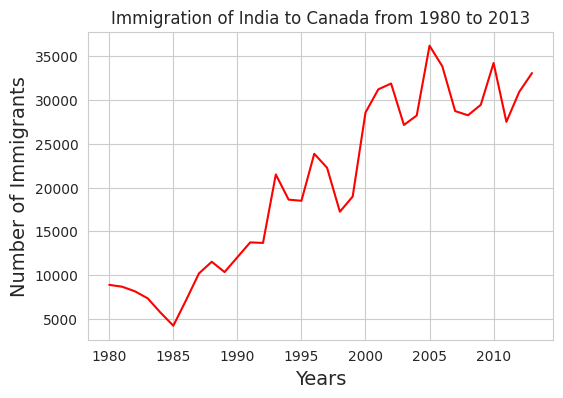

In [35]:
# Line plot for Immigration of India from 1980 to 2013
years = list(map(str, range(1980, 2014)))
data_india = data_indexed.loc['India', years]
plt.figure(figsize = (6,4))
data_india.plot(kind = 'line', color = 'red')
plt.xlabel('Years', fontsize = 14)
plt.ylabel('Number of Immigrants', fontsize = 14)
plt.title('Immigration of India to Canada from 1980 to 2013')
plt.grid(True)
plt.show()

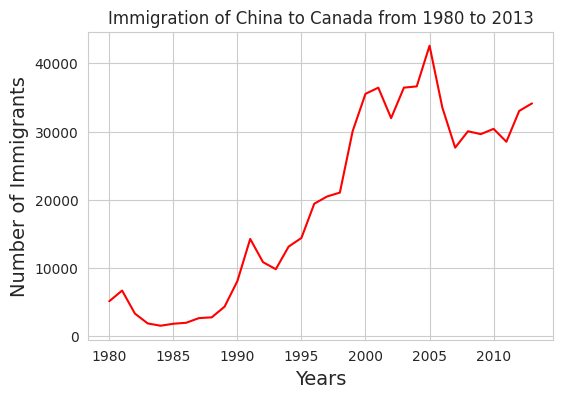

In [36]:
# Line plot for Immigration of China from 1980 to 2013
years = list(map(str, range(1980, 2014)))
data_china = data_indexed.loc['China', years]
plt.figure(figsize = (6,4))
data_china.plot(kind = 'line', color = 'red')
plt.xlabel('Years', fontsize = 14)
plt.ylabel('Number of Immigrants', fontsize = 14)
plt.title('Immigration of China to Canada from 1980 to 2013')
plt.grid(True)
plt.show()

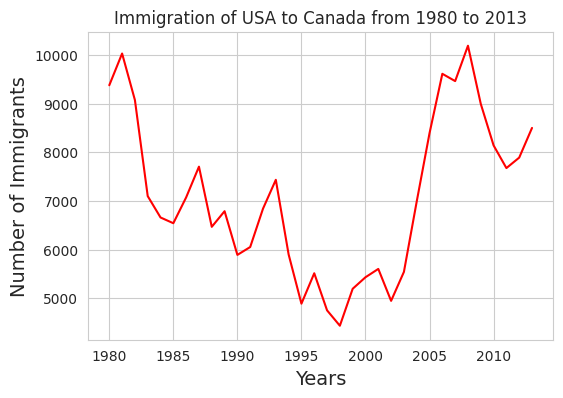

In [37]:
# Line plot for Immigration of USA from 1980 to 2013
years = list(map(str, range(1980, 2014)))
data_usa = data_indexed.loc['United States of America', years]
plt.figure(figsize = (6,4))
data_usa.plot(kind = 'line', color = 'red')
plt.xlabel('Years', fontsize = 14)
plt.ylabel('Number of Immigrants', fontsize = 14)
plt.title('Immigration of USA to Canada from 1980 to 2013')
plt.grid(True)
plt.show()

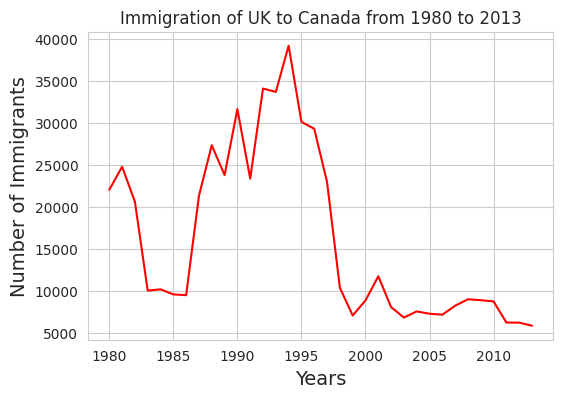

In [39]:
# Line plot for Immigration of UK from 1980 to 2013
years = list(map(str, range(1980, 2014)))
data_uk = data_indexed.loc['United Kingdom of Great Britain and Northern Ireland', years]
plt.figure(figsize = (6,4))
data_uk.plot(kind = 'line', color = 'red')
plt.xlabel('Years', fontsize = 14)
plt.ylabel('Number of Immigrants', fontsize = 14)
plt.title('Immigration of UK to Canada from 1980 to 2013')
plt.grid(True)
plt.show()

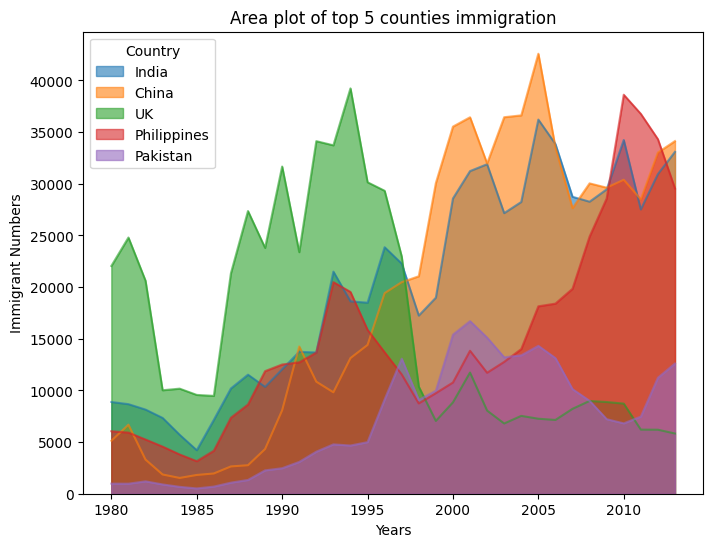

In [8]:
# Area plot for top 5 countries in the immigration data set
data_top5 = data.sort_values('Total', ascending = False, axis = 0).head()
data_top5['Country'] = data_top5['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'UK')
years = list(map(str, range(1980,2014)))
data_top5 = data_top5.set_index('Country')
data_area = data_top5.loc[['India','China','UK','Philippines','Pakistan'],years].transpose()
data_area.plot(kind = 'area', alpha = 0.6, figsize = (8,6),stacked = False)
plt.xlabel('Years')
plt.ylabel('Immigrant Numbers')
plt.title('Area plot of top 5 counties immigration')
plt.show()

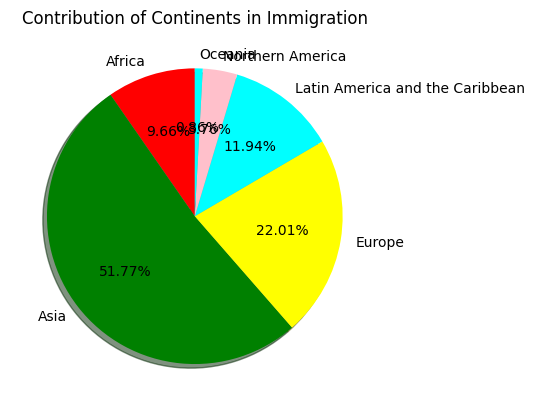

In [9]:
# Contribution of Continents from 1980 to 2013 using Pie Chart
data_continent = data.groupby('Continent')['Total'].sum()
labels = data_continent.index
sizes = data_continent.values
#plt.figure(figsize = (8,8))
plt.pie(sizes ,
        labels = labels,
        autopct = '%1.2f%%',
        colors = ['red','green','yellow','aqua','pink','cyan'],
        shadow = True,
        startangle = 90
        )
plt.title('Contribution of Continents in Immigration')
plt.show()
# Understand that Asia is the major immigrants provider to Canada

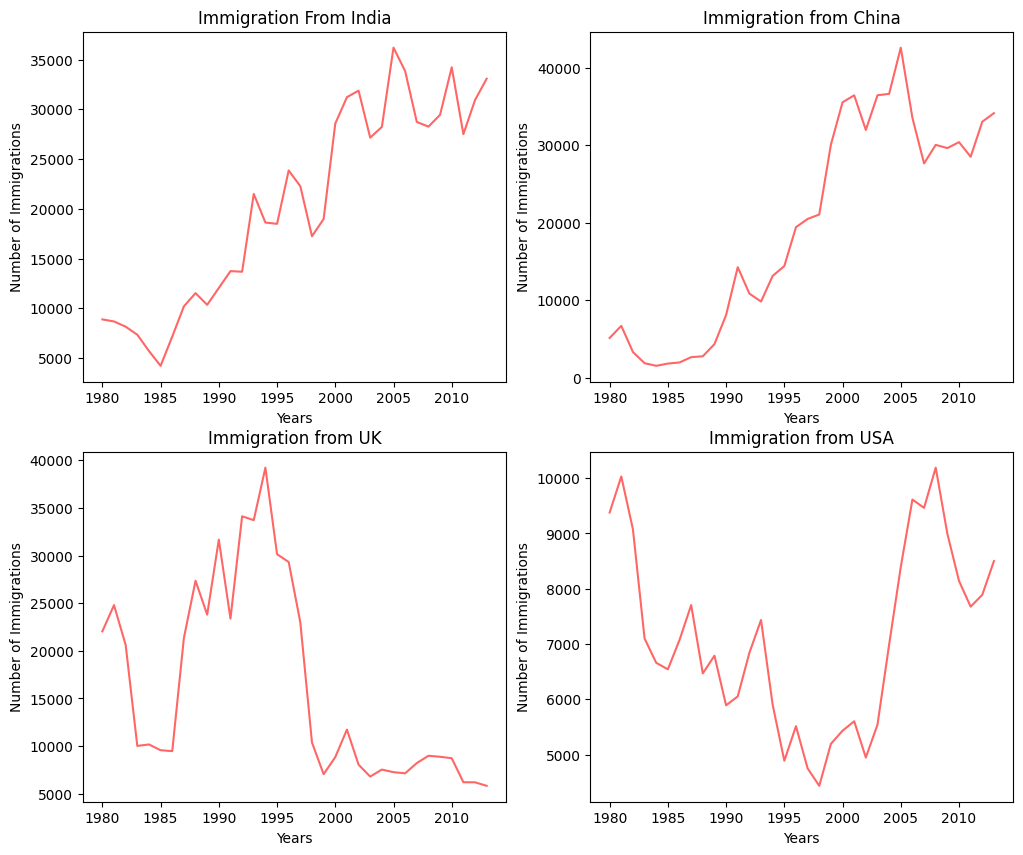

In [10]:
# Comparative study of Immigration of India, China, UK and USA using subplots
years = list(map(str, range(1980, 2014)))
data_india = data_indexed.loc[['India'],years].transpose()
data_china = data_indexed.loc[['China'],years].transpose()
data_uk = data_indexed.loc[['United Kingdom of Great Britain and Northern Ireland'], years].transpose()
data_usa = data_indexed.loc[['United States of America'],years].transpose()


fig = plt.figure(figsize = (12,10))
ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

# Plot for India
data_india.plot(kind = 'line',color = 'red', alpha = 0.6, ax = ax0)
ax0.set_title('Immigration for India')
ax0.set_xlabel('Years')
ax0.set_ylabel('Number of Immigrations')
ax0.set_title('Immigration From India')
ax0.get_legend().remove()

# Plot for China
data_china.plot(kind = 'line', color = 'red', alpha = 0.6, ax = ax1)
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of Immigrations')
ax1.set_title('Immigration from China')
ax1.get_legend().remove()

# Plot for Uk
data_uk.plot(kind = 'line', color = 'red', alpha = 0.6, ax = ax2)
ax2.set_xlabel('Years')
ax2.set_ylabel('Number of Immigrations')
ax2.set_title('Immigration from UK')
ax2.get_legend().remove()

# Plot For USA
data_usa.plot(kind = 'line', color = 'red', alpha = 0.6, ax = ax3)
ax3.set_xlabel('Years')
ax3.set_ylabel('Number of Immigrations')
ax3.set_title('Immigration from USA')
ax3.get_legend().remove()

plt.show()

In [17]:
# Plotting Bubble graph of India and China for Comparison study of immigration
# To create that, first bubble_data is created such that years occur in rows.
years = list(map(str,range(1980, 2014)))
bubble_data = data_indexed[years].transpose()
bubble_data.index = map(int, bubble_data.index)
bubble_data.index.name = 'Year'
bubble_data.reset_index(inplace = True)
bubble_data.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


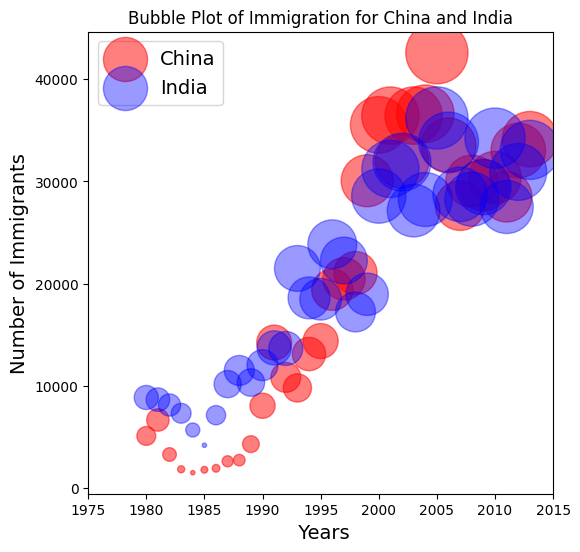

In [22]:
# Now we define normalized values for China and India.
# Using the method x-min(x)/max(x)- min(x)
norm_china = (bubble_data['China'] - bubble_data['China'].min())/(bubble_data['China'].max() - bubble_data['China'].min())
norm_india = (bubble_data['India'] - bubble_data['India'].min())/(bubble_data['India'].max() - bubble_data['India'].min())
# Plot for China
ax0 = bubble_data.plot(kind = 'scatter', x = 'Year', y = 'China',
                       figsize = (6,6),color = 'red', alpha = 0.5,
                       s = norm_china*2000+10, xlim = (1975,2015))
# Plot for India
ax1 = bubble_data.plot(kind = 'scatter', x = 'Year', y = 'India',
                       color = 'blue', alpha = 0.4,
                       s = norm_india*2000+10, ax = ax0)
# Customize the plot
ax0.set_xlabel(' Years', fontsize = 14)
ax0.set_ylabel('Number of Immigrants', fontsize = 14)
ax0.set_title('Bubble Plot of Immigration for China and India')
ax0.legend(['China','India'], loc = 'upper left', fontsize = 14)
plt.show()

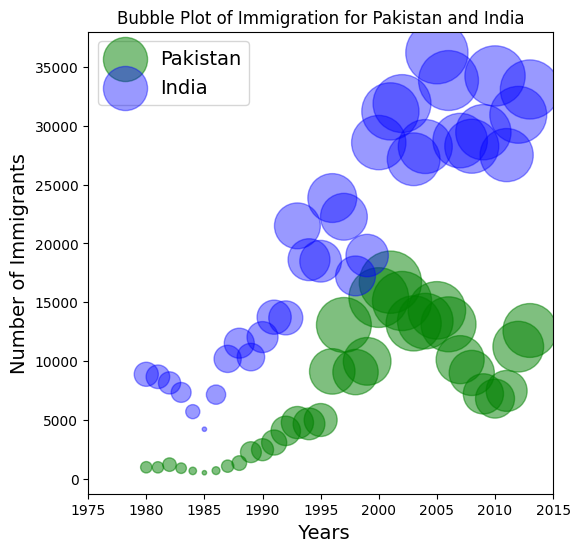

In [23]:
# Now we define normalized values for India and Pakistan.
# Using the method x-min(x)/max(x)- min(x)
norm_pakistan=(bubble_data['Pakistan']-bubble_data['Pakistan'].min())/(bubble_data['Pakistan'].max()-bubble_data['Pakistan'].min())
norm_india=(bubble_data['India'] - bubble_data['India'].min())/(bubble_data['India'].max() - bubble_data['India'].min())
# Plot for Pakistan
ax0 = bubble_data.plot(kind = 'scatter', x = 'Year', y = 'Pakistan',
                       figsize = (6,6),color = 'green', alpha = 0.5,
                       s = norm_pakistan*2000+10, xlim = (1975,2015))
# Plot for India
ax1 = bubble_data.plot(kind = 'scatter', x = 'Year', y = 'India',
                       color = 'blue', alpha = 0.4,
                       s = norm_india*2000+10, ax = ax0)
# Customize the plot
ax0.set_xlabel(' Years', fontsize = 14)
ax0.set_ylabel('Number of Immigrants', fontsize = 14)
ax0.set_title('Bubble Plot of Immigration for Pakistan and India')
ax0.legend(['Pakistan','India'], loc = 'upper left', fontsize = 14)
plt.show()

In [27]:
# Regression Plot for Denmark, Norway and Sweden
# First we consider the dataset that is created as following
years = list(map(str, range(1980, 2014)))
data_dns = data_indexed.loc[['Denmark', 'Norway','Sweden'],years].transpose()
data_reg = pd.DataFrame(data_dns.sum(axis = 1))
data_reg.reset_index(inplace = True)
data_reg.columns = ['Years','Total']
data_reg['Years'] = data_reg['Years'].astype(int)
data_reg.head()

,Years,Total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


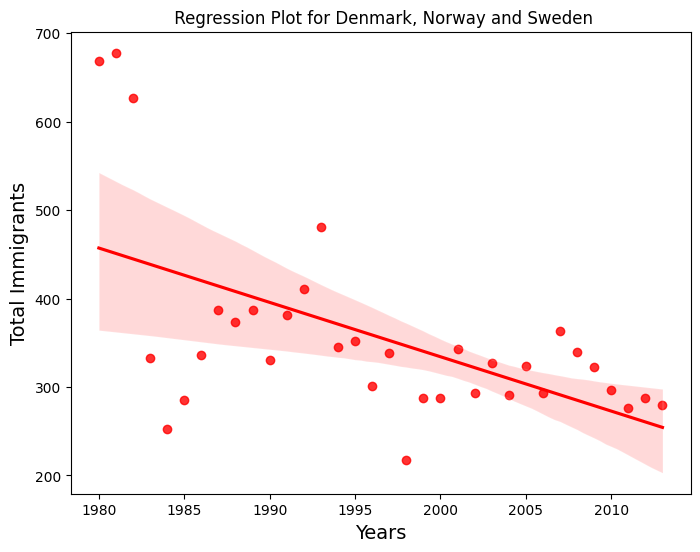

In [29]:
# Now we create the Regression Plot with the help of Seaborn library
plt.figure(figsize = (8,6))
ax = sns.regplot(x = 'Years', y = 'Total',
                 data = data_reg, color = 'red', marker = 'o')
ax.set_xlabel('Years', fontsize = 14)
ax.set_ylabel('Total Immigrants', fontsize = 14)
ax.set_title(' Regression Plot for Denmark, Norway and Sweden')
sns.set_style('whitegrid')
plt.show()
# It is evident that the line represents a negative correlation
# Suggesting that the number of immigrants decreases as year increases.